#Data Science and Business Analytics Intern @ The Sparks Foundation
##S Arut Prakash : TASK-6 PREDICTION USING DECISION TREE ALGORITHM
OBJECTIVE : CREATE A DECISION TREE TO PREDICT RIGHT CLASS AND VISUALIZE IT GRAPHICALLY

In [1]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Science and Business Analytics - Spark Internship/Task 6 - Prediction using Decision Tree Algorithm

/content/drive/MyDrive/Colab Notebooks/Data Science and Business Analytics - Spark Internship/Task 6 - Prediction using Decision Tree Algorithm


Importing the dataset

In [4]:
iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Describing the Dataset

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [7]:
iris.info

<bound method DataFrame.info of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [8]:
# CHECK FOR NULL VALUES
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Box Plot to. check for Outliners

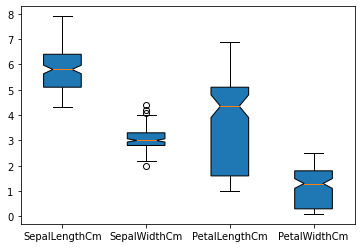

In [9]:
SepalLengthCm = iris['SepalLengthCm']
SepalWidthCm = iris['SepalWidthCm']
PetalLengthCm = iris['PetalLengthCm']
PetalWidthCm = iris['PetalWidthCm']

columns = [SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]

fig,ax = plt.subplots()
ax.boxplot(columns,notch=True,patch_artist=True)
plt.xticks([1,2,3,4],['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
plt.show()

From the plot we can see thta 'SepalWidthCm' has Outliners. This can affect the classification

Finding the Inter-Quartile Range to get the min and max values of the Whiskers from the box plot

In [10]:
Q1 = iris['SepalWidthCm'].quantile(0.25)
Q3 = iris['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

ur = Q3+1.5*IQR
lr = Q1-1.5*IQR

Now removing all the values greater than 'ur' and lesser than 'lr'

In [11]:
samp = iris.index[iris['SepalWidthCm'] > ur]
samp.append(iris.index[iris['SepalWidthCm'] < lr])
iris = iris.drop(samp)
iris.reset_index(drop=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
142,146,6.7,3.0,5.2,2.3,Iris-virginica
143,147,6.3,2.5,5.0,1.9,Iris-virginica
144,148,6.5,3.0,5.2,2.0,Iris-virginica
145,149,6.2,3.4,5.4,2.3,Iris-virginica


#The Decision Tree Algorithm

Spliting dataset into Train and Test

In [12]:
from sklearn.model_selection import train_test_split

df = iris.copy()
x = df.iloc[:,1:5]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

Decision Tree Classification

In [13]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Finding the predicted value using the Testing Data

In [14]:
y_pred = dtree.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica'], dtype=object)

Accuracy

In [15]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

97.2972972972973

Comparing Actual and Predicted

In [16]:
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica


Confusion Matrix for better understanding 

In [17]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa               14                0               0
Iris-versicolor            0                9               1
Iris-virginica             0                0              13


Heat Map on the Confusion Matrix

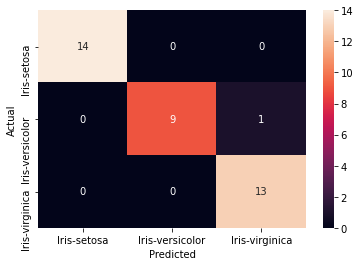

In [18]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

##Plotting Accuracy Score Depth Wise

In [20]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    accuracy.append(score)

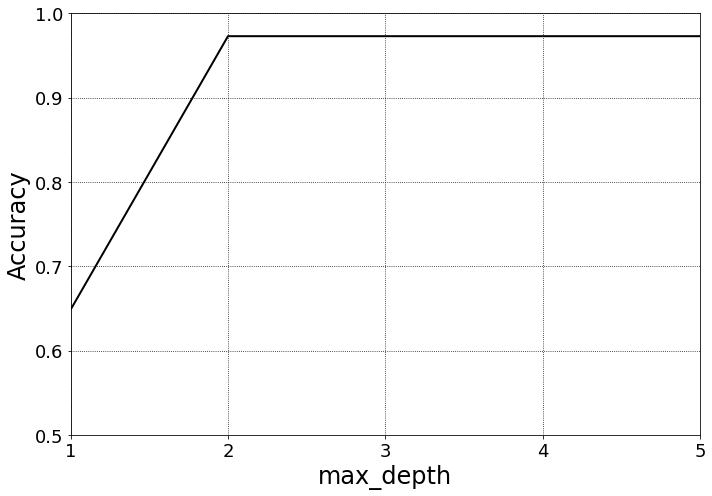

In [21]:
#ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')


ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

#Visualising the Decision Tree

In [22]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


Plotting the Decision Tree Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.


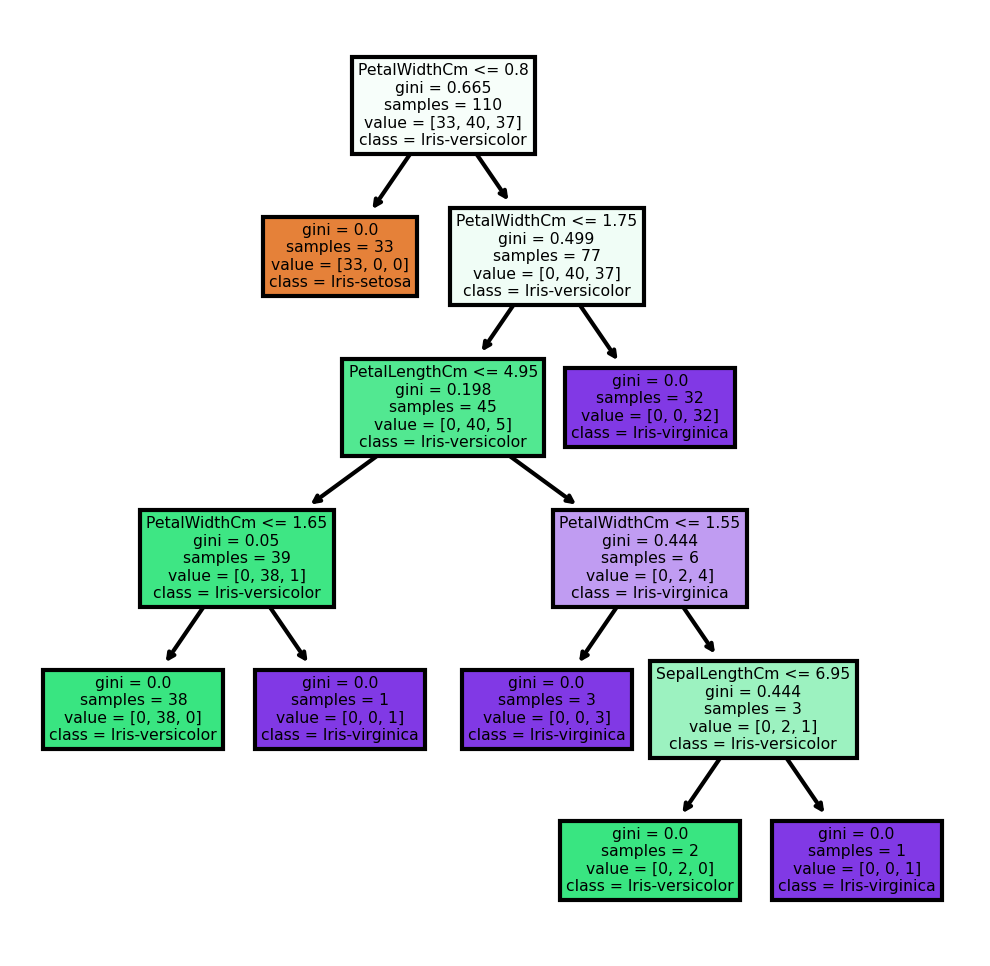

In [31]:
from sklearn import tree
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300,facecolor='W')
tree.plot_tree(dtree,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTree.png')

Prediction

In [24]:
dtree.predict_proba([[4.7,3.2,1.3,0.2]])

array([[1., 0., 0.]])

In [25]:
dtree.predict([[4.7,3.2,1.3,0.2]])

array(['Iris-setosa'], dtype=object)

##Conclusion
After Importing, Fit our dataset in our model, accuracy is 97.29%.


We can clearly see model performance by confusion matrix and classification report.


By ploting accuracy score depth wise graph, optimal depth for model is 2.